# Импорты

In [ ]:
# import kagglehub
# kagglehub.login()

In [ ]:
nlp_getting_started_path = kagglehub.competition_download('nlp-getting-started')

keras_distil_bert_keras_distil_bert_base_en_uncased_3_path = kagglehub.model_download('keras/distil_bert/Keras/distil_bert_base_en_uncased/3')

print('Data source import complete.')



  0%|          | 0.00/226k [00:00<?, ?B/s]



100%|██████████| 208/208 [00:00<00:00, 418kB/s]




100%|██████████| 794/794 [00:00<00:00, 2.35MB/s]




  0%|          | 0.00/253M [00:00<?, ?B/s]
100%|██████████| 226k/226k [00:00<00:00, 1.01MB/s]



100%|██████████| 462/462 [00:00<00:00, 1.54MB/s]


  0%|          | 1.00M/253M [00:00<01:40, 2.64MB/s]

  1%|          | 3.00M/253M [00:00<00:35, 7.31MB/s]

  4%|▎         | 9.00M/253M [00:00<00:12, 21.0MB/s]

  5%|▍         | 12.0M/253M [00:00<00:12, 20.9MB/s]

  7%|▋         | 18.0M/253M [00:00<00:08, 29.3MB/s]

  9%|▊         | 22.0M/253M [00:01<00:09, 25.7MB/s]

 11%|█         | 27.0M/253M [00:01<00:07, 30.5MB/s]

 13%|█▎        | 34.0M/253M [00:01<00:07, 30.6MB/s]

 15%|█▌        | 39.0M/253M [00:01<00:06, 34.7MB/s]

 18%|█▊        | 45.0M/253M [00:01<00:06, 34.5MB/s]

 20%|█▉        | 50.0M/253M [00:01<00:05, 35.8MB/s]

 23%|██▎       | 58.0M/253M [00:02<00:04, 43.1MB/s]

 26%|██▌       | 65.0M/253M [00:02<00:04, 47.0MB/s]

 28%|██▊       | 70.0M/253M [00:02<00:04, 40.9MB/s]

 30%|██▉       | 76.0M/253M [00:02<00:04, 44.7MB/s]

 32%|███▏      | 81.0M/253M [00:02<00:04, 40.8MB/s]

 34%|███▍      | 87.0M/253M [00:02<00:04, 43.5MB/s]

 36%|███▋      | 92.0M/253M [00:02<00:04, 40.0M

Data source import complete.


In [ ]:
!pip install keras-nlp --upgrade
!pip install keras-core --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.5/876.5 kB 16.6 MB/s eta 0:00:00
  Attempting uninstall: keras-hub
    Found existing installation: keras-hub 0.18.1
    Uninstalling keras-hub-0.18.1:
      Successfully uninstalled keras-hub-0.18.1
  Attempting uninstall: keras-nlp
    Found existing installation: keras-nlp 0.18.1
    Uninstalling keras-nlp-0.18.1:
      Successfully uninstalled keras-nlp-0.18.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 18.2 MB/s eta 0:00:00


In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
sns.set(style="white")


# Загрузка данных

In [ ]:
# train = pd.read_csv("/nlp-getting-started/train.csv")
# test = pd.read_csv("/nlp-getting-started/test.csv")

!git clone https://github.com/mitramir55/Kaggle_NLP_competition.git
train = pd.read_csv('Kaggle_NLP_competition/train.csv')
test = pd.read_csv('Kaggle_NLP_competition/test.csv')
print(train.shape)
print(test.shape)

Cloning into 'Kaggle_NLP_competition'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 81 (delta 0), reused 0 (delta 0), pack-reused 80 (from 1)
Receiving objects: 100% (81/81), 11.05 MiB | 3.75 MiB/s, done.
Resolving deltas: 100% (36/36), done.
(7613, 5)
(3263, 4)


In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Анализ

<ipython-input-9-6a02cdb3d3fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x="target", palette="pastel")


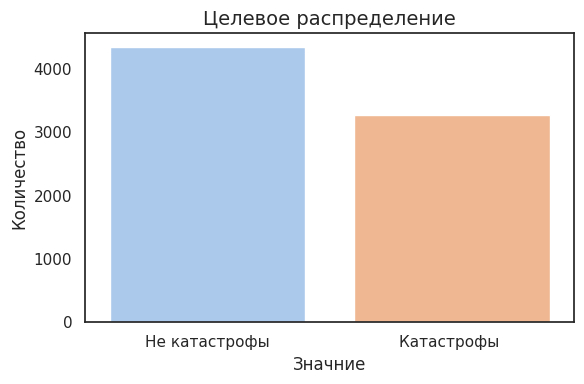

,count
target,
0,4342
1,3271


In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=train, x="target", palette="pastel")
plt.title("Целевое распределение", fontsize=14)
plt.xlabel("Значние", fontsize=12)
plt.ylabel("Количество", fontsize=12)
plt.xticks([0, 1], ['Не катастрофы', 'Катастрофы '])
plt.tight_layout()
plt.show()

train.target.value_counts()

In [ ]:
# Обнаружение нулевых значений и записей
nulls = pd.DataFrame(np.c_[train.isnull().sum(), (train.isnull().sum() / len(train))*100],
                    columns=['# нулей', '% нулей'],
                    index=train.columns)
nulls

,# нулей,% нулей
id,0.0,0.000000
keyword,61.0,0.801261
location,2533.0,33.272035
text,0.0,0.000000
target,0.0,0.000000


In [ ]:
# Заполнение пропущенных значений (NaN) в столбцах keyword и location
for df in [train, test]:
    df.keyword.fillna('unknown', inplace = True)
    df.location.fillna('unknown', inplace = True)

<ipython-input-11-858ddd787753>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.keyword.fillna('unknown', inplace = True)
<ipython-input-11-858ddd787753>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

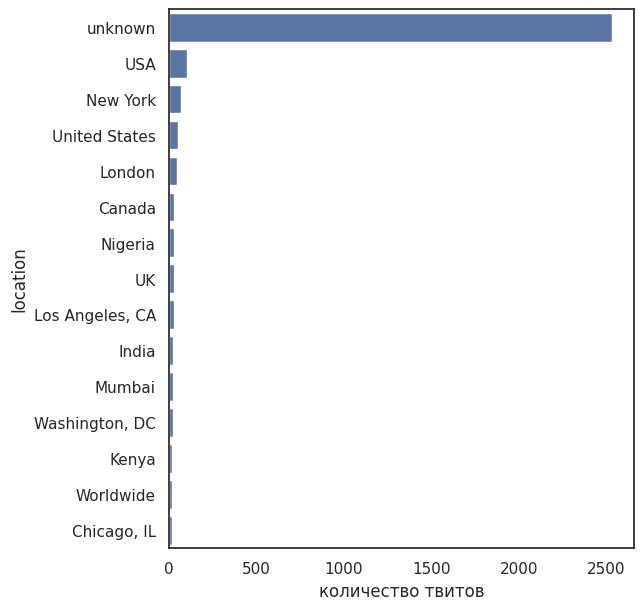

In [ ]:
# 20 популярных мест в наборе данных
top_15 = train.groupby(['location']).count().text.sort_values(ascending = False)[:15]

plt.figure(figsize = (6,7))
sns.barplot(x = top_15, y = top_15.index);
plt.xlabel('количество твитов');

<ipython-input-13-412367044f26>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count_dis_keywords.target,
<ipython-input-13-412367044f26>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = count_non_dis_keywords.target, y = count_non_dis_keywords.index,
<ipython-input-13-412367044f26>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels =ax.get_yticklabels() ,
<ipython-input-13-412367044f26>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(labels =ax.get_yticklabels() ,


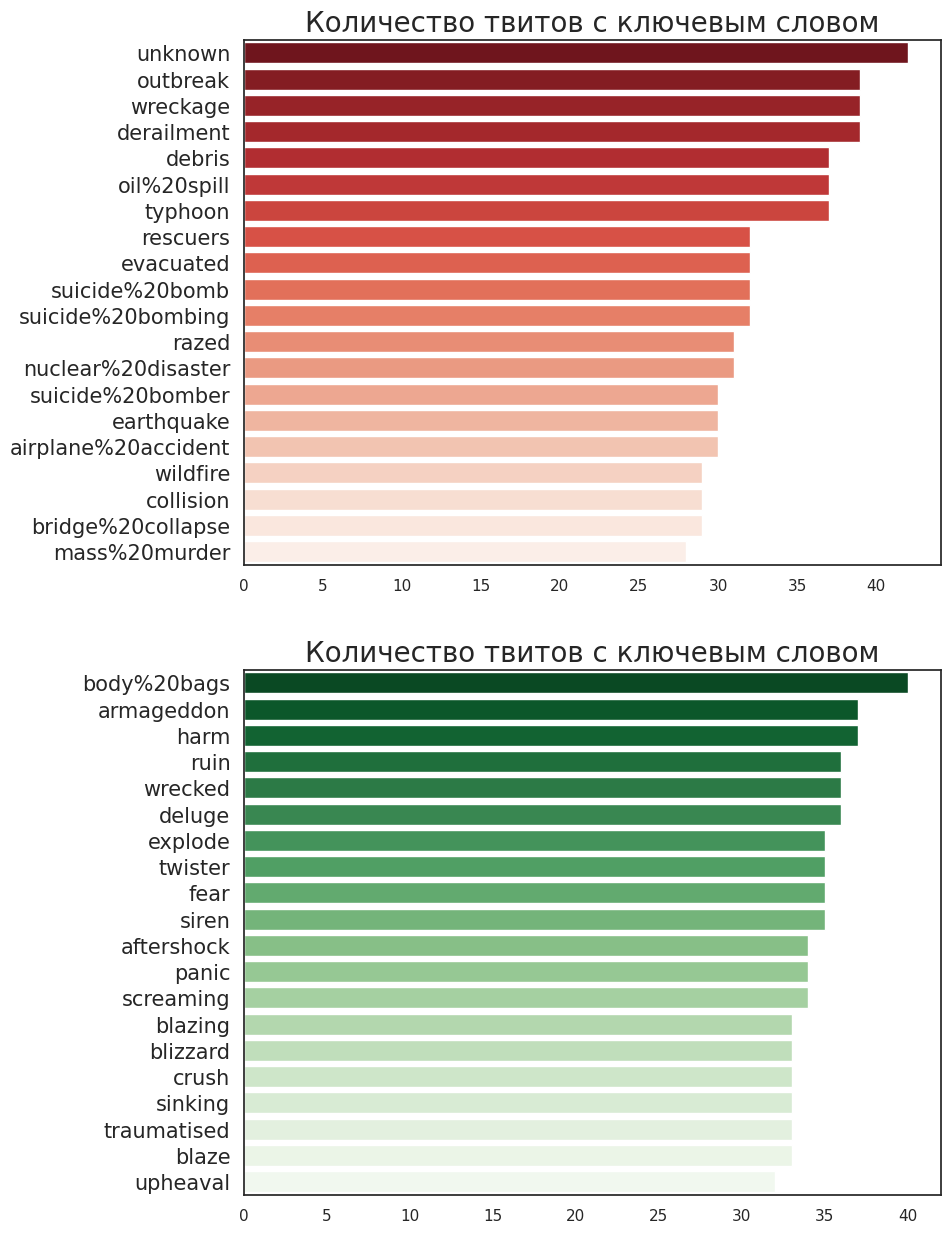

In [ ]:
# 20 ключевых слов в катастрофических и не_дисастрационных твитах
count_dis_keywords = train[train.target == 1].groupby(['keyword']).count().sort_values(by = 'target', ascending = False)[:20]
count_non_dis_keywords =  train[train.target == 0].groupby(['keyword']).count().sort_values(by = 'target', ascending = False)[:20]

fig, ax_ = plt.subplots(2, 1, figsize = (9,15));

sns.barplot(x = count_dis_keywords.target,
            y = count_dis_keywords.index,
            ax = ax_[0],
            palette = 'Reds_r', label = 'dis')

sns.barplot(x = count_non_dis_keywords.target, y = count_non_dis_keywords.index,
            ax = ax_[1], palette = 'Greens_r', label = 'non_dis')


for ax in [ax_[0], ax_[1]]:

    ax.set_title('Количество твитов c ключевым словом', fontsize = 20)

    ax.set_ylabel('')
    ax.set_xlabel('')

    ax.set_yticklabels(labels =ax.get_yticklabels() ,
                       fontsize = 15);

# Логистическая регрессия

In [ ]:
# Удаление дубликатов твитов, ненужные столбцы и заполнить отсутствующие значения «ключевых слов»
df_train = train.copy()
df_train = df_train.drop_duplicates(subset='text')
df_train = df_train.drop(['id', 'location'], axis=1)

df_train.head(10)

,keyword,text,target
0,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,unknown,Forest fire near La Ronge Sask. Canada,1
2,unknown,All residents asked to 'shelter in place' are ...,1
3,unknown,"13,000 people receive #wildfires evacuation or...",1
4,unknown,Just got sent this photo from Ruby #Alaska as ...,1
5,unknown,#RockyFire Update => California Hwy. 20 closed...,1
6,unknown,#flood #disaster Heavy rain causes flash flood...,1
7,unknown,I'm on top of the hill and I can see a fire in...,1
8,unknown,There's an emergency evacuation happening now ...,1
9,unknown,I'm afraid that the tornado is coming to our a...,1


In [ ]:
import re
import spacy

# Загрузить модель spaCy English (с отключенным парсером и NER для более высокой производительности)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

def clean_text_spacy(text):
    text = text.lower() # в нижний регистр
    text = re.sub(r"http\S+|www\S+|@\w+", "", text) # удаление URL-адресов и упоминаний
    text = re.sub(r"#(\w+)", r"\1", text) # упрошение хэштегов
    text = re.sub(r"[^a-zA-Z\s]", "", text) # удаление специальных символов и цифр
    text = re.sub(r"\s+", " ", text).strip() # удаление лишних пробелов

    # Лемматизация, удаление стоп-слов, сохранение токенов длиннее 2 символов
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop \
        and len(token) > 2]

    return " ".join(tokens)

In [ ]:
df_train_processed = df_train.copy()
df_train_processed['cleaned_text'] = df_train_processed['text'].apply(clean_text_spacy)

df_train_processed.head(8)

,keyword,text,target,cleaned_text
0,unknown,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,unknown,Forest fire near La Ronge Sask. Canada,1,forest fire near ronge sask canada
2,unknown,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,unknown,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,unknown,Just got sent this photo from Ruby #Alaska as ...,1,get send photo ruby alaska smoke wildfire pour...
5,unknown,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy close directio...
6,unknown,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain cause flash flooding...
7,unknown,I'm on top of the hill and I can see a fire in...,1,hill fire wood


In [ ]:
df_train_processed.keyword.unique()

array(['unknown', 'ablaze', 'accident', 'aftershock',
       'airplane%20accident', 'ambulance', 'annihilated', 'annihilation',
       'apocalypse', 'armageddon', 'army', 'arson', 'arsonist', 'attack',
       'attacked', 'avalanche', 'battle', 'bioterror', 'bioterrorism',
       'blaze', 'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard',
       'blood', 'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail'

In [ ]:
from urllib.parse import unquote

df_train_processed['keyword'] = df_train_processed['keyword'].apply(
    lambda x: unquote(x.replace('+', ' ')))

df_train_processed['final_text'] = df_train_processed['keyword'] + \
    ' ' + df_train_processed['cleaned_text']

In [ ]:
df_train_processed = df_train_processed.drop(
    ['keyword', 'text', 'cleaned_text'], axis=1)

df_train_processed = df_train_processed[['final_text', 'target']]

df_train_processed.head()

,final_text,target
0,unknown deed reason earthquake allah forgive,1
1,unknown forest fire near ronge sask canada,1
2,unknown resident ask shelter place notify offi...,1
3,unknown people receive wildfire evacuation ord...,1
4,unknown get send photo ruby alaska smoke wildf...,1


## Обучение модели

In [ ]:
vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1, 2),
    stop_words=None
)

# Преобразование текстовых данных в векторы TF-IDF
X = vectorizer.fit_transform(df_train_processed['final_text'])
y = df_train_processed['target']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Оценка модели


In [ ]:
y_pred_val = model.predict(X_val)
y_pred_train = model.predict(X_train)

print("Отчет о классификации тренировочного набора:")
print(classification_report(y_train, y_pred_train))
print(' ')
print("Отчет о классификации валидационного набора:")
print(classification_report(y_val, y_pred_val))

Отчет о классификации тренировочного набора:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      3444
           1       0.85      0.84      0.84      2558

    accuracy                           0.87      6002
   macro avg       0.87      0.86      0.87      6002
weighted avg       0.87      0.87      0.87      6002

 
Отчет о классификации валидационного набора:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       861
           1       0.78      0.76      0.77       640

    accuracy                           0.81      1501
   macro avg       0.80      0.80      0.80      1501
weighted avg       0.81      0.81      0.81      1501



In [ ]:
import joblib

# Сохранение TF-IDF векторизатора
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")

# Сохранение модели
joblib.dump(model, "logreg_model.joblib")

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Предсказания")
    plt.ylabel("Истинные")
    plt.title(title)
    plt.show()

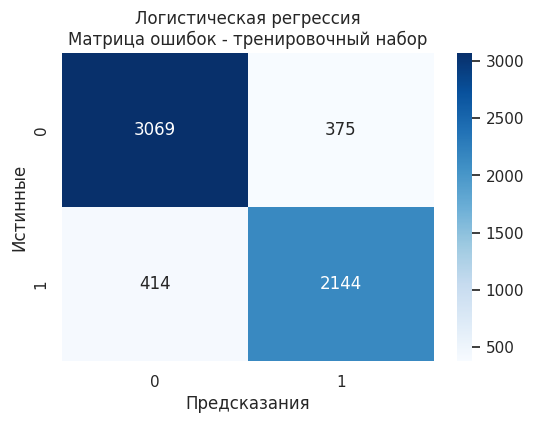

In [ ]:
plot_confusion_matrix(y_train, y_pred_train, "Логистическая регрессия\nМатрица ошибок - тренировочный набор")

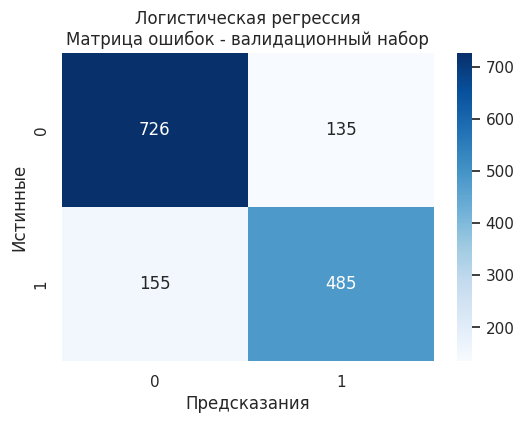

In [ ]:
plot_confusion_matrix(
    y_val, y_pred_val, "Логистическая регрессия\nМатрица ошибок - валидационный набор")

# Модель 2: DistilBERT



In [ ]:
import keras_nlp
import keras_core as keras
from keras_nlp.models import DistilBertClassifier
from keras import losses, optimizers

Using TensorFlow backend


In [ ]:
db_train = train.copy()
db_test = test.copy()

# Предварительная обработка обучающих данных
db_train = db_train.drop_duplicates(subset='text')
db_train = db_train.drop(['id', 'location'], axis=1)
db_train['keyword'] = db_train['keyword'].fillna('unknown')

# Предварительная обработка тестовых данных
db_test = db_test.drop(['id', 'location'], axis=1)
db_test['keyword'] = db_test['keyword'].fillna('unknown')

db_train.head()

,keyword,text,target
0,unknown,Our Deeds are the Reason of this #earthquake M...,1
1,unknown,Forest fire near La Ronge Sask. Canada,1
2,unknown,All residents asked to 'shelter in place' are ...,1
3,unknown,"13,000 people receive #wildfires evacuation or...",1
4,unknown,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Декодировка ключевых слов, закодированных в URL
db_train['keyword'] = db_train['keyword'].apply(lambda x: unquote(x.replace('+', ' ')))
db_test['keyword'] = db_test['keyword'].apply(lambda x: unquote(x.replace('+', ' ')))

# Объединение «keyword» и «cleaned_text» в один столбец «final_text»
db_train['final_text'] = db_train['keyword'] + ' ' + db_train['text']
db_test['final_text'] = db_test['keyword'] + ' ' + db_test['text']

In [ ]:
db_train = db_train.drop(['keyword', 'text'], axis=1)
db_test = db_test.drop(['keyword', 'text'], axis=1)

In [ ]:
db_train.head()

,target,final_text
0,1,unknown Our Deeds are the Reason of this #eart...
1,1,unknown Forest fire near La Ronge Sask. Canada
2,1,unknown All residents asked to 'shelter in pla...
3,1,"unknown 13,000 people receive #wildfires evacu..."
4,1,unknown Just got sent this photo from Ruby #Al...


In [ ]:
db_test.head()

,final_text
0,unknown Just happened a terrible car crash
1,unknown Heard about #earthquake is different c...
2,"unknown there is a forest fire at spot pond, g..."
3,unknown Apocalypse lighting. #Spokane #wildfires
4,unknown Typhoon Soudelor kills 28 in China and...


## Анализ длины токенов



In [ ]:
X_db = db_train['final_text']
y_db = db_train['target']

X_train, X_val, y_train, y_val = train_test_split(
    X_db, y_db,
    stratify=y_db,
    test_size=0.2,
    random_state=42)

X_test = db_test['final_text']

In [ ]:
from transformers import AutoTokenizer
# Загрузка токенизатора, соответствующего DistilBERT
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# Рассчет длины токенов
token_lens = [len(tokenizer(text)['input_ids']) for text in X_db]

print("Mean length:", np.mean(token_lens))
print("Max length:", np.max(token_lens))
print("95% cover:", np.percentile(token_lens, 95))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Mean length: 34.662534986005596
Max length: 85
95% cover: 54.0


In [ ]:
preset = "distil_bert_base_en_uncased"

# Инициализация препроцессора
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    preset,
    sequence_length=64,
    name="tweet_preprocessor"
)

# Инициализациия модели DistilBERT
classifier = keras_nlp.models.DistilBertClassifier.from_preset(
    preset,
    preprocessor=preprocessor,
    num_classes=2
)

classifier.summary()

Preprocessor: "tweet_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)                   │                       Vocab size: 30,522 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "distil_bert_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

## Обучение модели

In [ ]:
# Компиляция модели
classifier.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=1e-5),
    metrics=["accuracy"]
)

# Обучение модели
history = classifier.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=2,
    batch_size=32
)

Epoch 1/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 116s 402ms/step - accuracy: 0.7302 - loss: 0.5613 - val_accuracy: 0.8428 - val_loss: 0.3858
Epoch 2/2
188/188 ━━━━━━━━━━━━━━━━━━━━ 97s 274ms/step - accuracy: 0.8368 - loss: 0.3849 - val_accuracy: 0.8474 - val_loss: 0.3811


In [ ]:
y_train_pred_probs = classifier.predict(X_train)

188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step


In [ ]:
y_val_pred_probs = classifier.predict(X_val)

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step


In [ ]:
y_train_pred = np.argmax(y_train_pred_probs, axis=1)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

## Оценка модели

In [ ]:
print("Отчет о классификации тренировочного набора:")
print(classification_report(y_train, y_train_pred))
print(' ')
print("Отчет о классификации валидационного набора:")
print(classification_report(y_val, y_val_pred))

Отчет о классификации тренировочного набора:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3444
           1       0.91      0.83      0.87      2558

    accuracy                           0.89      6002
   macro avg       0.89      0.88      0.89      6002
weighted avg       0.89      0.89      0.89      6002

 
Отчет о классификации валидационного набора:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       861
           1       0.85      0.77      0.81       640

    accuracy                           0.85      1501
   macro avg       0.85      0.84      0.84      1501
weighted avg       0.85      0.85      0.85      1501



In [ ]:
# Сохранение модели
classifier.save("saved_model_disaster_tweets.keras")

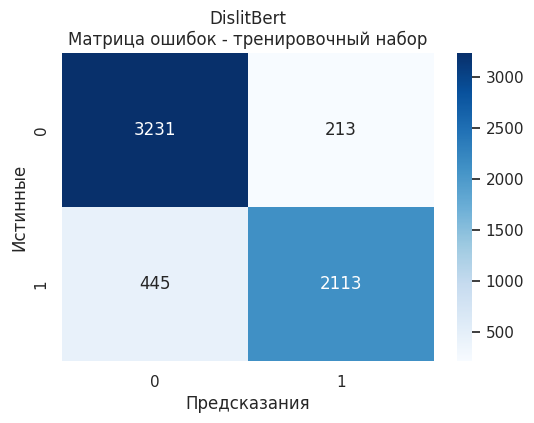

In [ ]:
plot_confusion_matrix(y_train, y_train_pred, "DislitBert\nМатрица ошибок - тренировочный набор")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

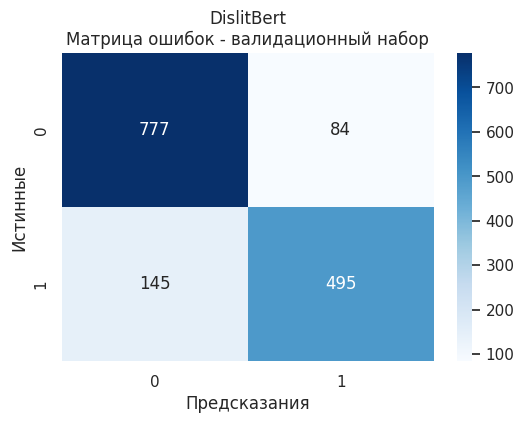

In [ ]:
plot_confusion_matrix(y_val, y_val_pred, "DislitBert\nМатрица ошибок - валидационный набор")